In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [9]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [10]:
len(X_train)

60000

In [11]:
len(X_test)

10000

In [13]:
X_train[0].shape

(28, 28)

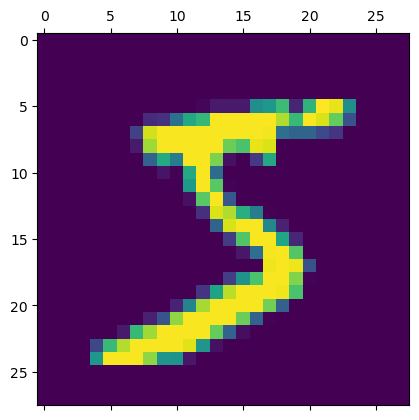

In [15]:
plt.matshow(X_train[0])

In [27]:
X_train = X_train/255
X_test = X_test/255

In [28]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [29]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [30]:
model = keras.Sequential([
        keras.layers.Dense(10,input_shape=(784,),activation ='sigmoid')
    ])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']   
)
model.fit(X_train_flattened,y_train,epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4692 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9258


In [31]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2668 - accuracy: 0.9248


[0.26675933599472046, 0.9247999787330627]

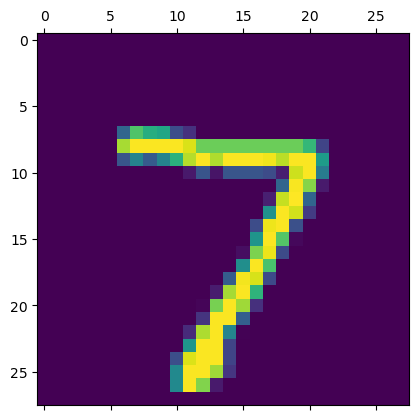

In [33]:
plt.matshow(X_test[0])

In [40]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([1.8528752e-02, 3.7255731e-07, 7.7033512e-02, 9.4339812e-01,
       2.8471875e-03, 9.7354189e-02, 9.4426224e-07, 9.9981225e-01,
       1.1420167e-01, 6.0391754e-01], dtype=float32)

In [41]:
np.argmax(y_predicted[0])

7

In [42]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [45]:
cm = tf.math.confusion_matrix(labels = y_test,predictions =y_predicted_labels )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    8,    2,    2,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   4,    7,  937,   15,    8,    2,   11,    9,   37,    2],
       [   1,    0,   26,  915,    0,   23,    2,   12,   24,    7],
       [   1,    1,    7,    1,  918,    0,   10,    3,   12,   29],
       [   8,    2,    6,   40,   11,  769,   15,    6,   29,    6],
       [   7,    3,    9,    1,    7,   11,  914,    2,    4,    0],
       [   1,    5,   25,    7,    9,    0,    0,  948,    4,   29],
       [   5,    7,    8,   21,    9,   21,   10,   13,  877,    3],
       [   9,    7,    2,   10,   34,    7,    0,   28,   10,  902]])>

Text(95.72222222222221, 0.5, 'Truth')

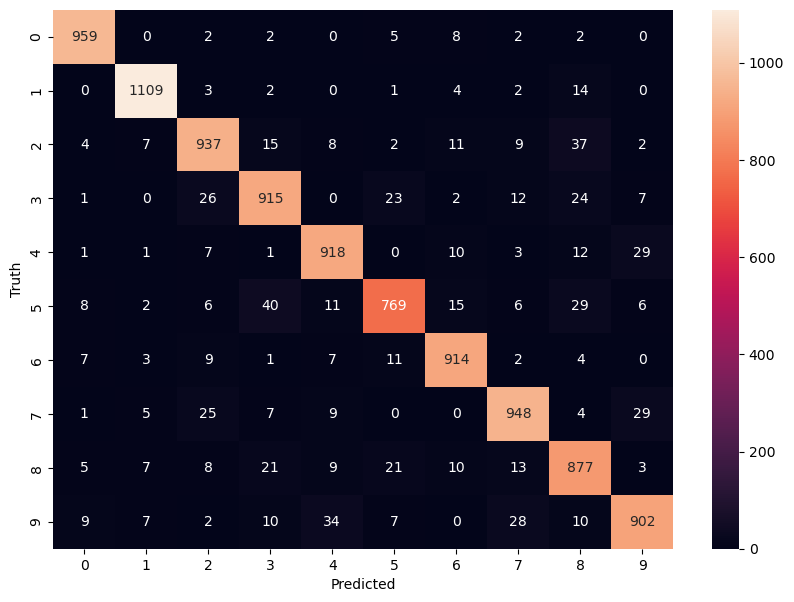

In [48]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
model = keras.Sequential([
        keras.layers.Dense(100,input_shape=(784,),activation ='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']   
)
model.fit(X_train_flattened,y_train,epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2747 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1245 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0879 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0528 - accuracy: 0.9833


In [52]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0944 - accuracy: 0.9719


[0.09435824304819107, 0.9718999862670898]

Text(95.72222222222221, 0.5, 'Truth')

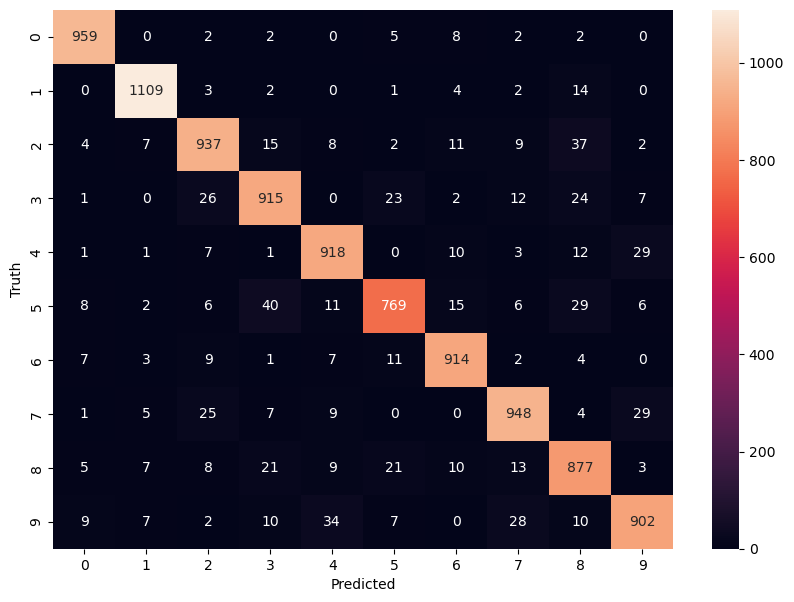

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(100,activation ='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']   
)
model.fit(X_train ,y_train,epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2781 - accuracy: 0.9201
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1284 - accuracy: 0.9621
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0894 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0690 - accuracy: 0.9786
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0540 - accuracy: 0.9833
